# <b>Viral Tweets</b>
#  Twitter Classification Cumulative Project Part-1

My Codecademy Challenging Part-1 Project From The Data Scientist Path Foundations of Machine Learning: Supervised Learning Course, Advance Classification Models Section.

## <b>Overview</b>

In this project, Twitter Classification Cumulative Project, I use real tweets to find patterns in the way people use social media.
There are two parts to this project:
- Part-1: Viral Tweets (This Section).
- Part-2: Classifying Tweets, using Naive Bayes classifiers to predict whether a tweet was sent from New York City, London, or Paris. 

### + Viral Tweets Project Goal

Predict Viral Tweets, using a K-Nearest Neighbors classifier to predict whether or not a tweet will go viral.<br>
Note: I went beyond the project's goal, by evaluating three different models.

### + Project Requirements

Be familiar with:

- Python3
- Machine Learning: Supervised Learning
<br><br>
- The Python Libraries:
    - Pandas
    - NumPy
    - Matplotlib
    - Sklearn

### + Links:
[Blog Viral Tweets](https://www.alex-ricciardi.com/post/viral-tweets)<br>
[Project GitHub](https://github.com/ARiccGitHub/viral_tweets)

##  <b>Libraries:</b>

In [1]:
# Data manipulation tool
import pandas as pd
# Scientific computing, array
import numpy as np
# Data visualization
from matplotlib import pyplot as plt
# Theme to use with matplotlib
from jupyterthemes import jtplot
jtplot.style(theme='chesterish')
# Data scaler
from sklearn.preprocessing import scale
# Data splitter
from sklearn.model_selection import train_test_split
# K-Nearest Neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# Model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score

## <b>Exploring the data</b>

##### - Loading the data:

In [2]:
all_tweets = pd.read_json("data_json/random_tweets.json", lines=True)

##### -  Number of tweets in the data:

In [3]:
len(all_tweets)

11099

#####  - Features and features' data type:

In [4]:
features_type = all_tweets[all_tweets.columns].dtypes.to_frame().rename(columns={0:'dtype'})
features_type

,dtype
created_at,"datetime64[ns, UTC]"
id,int64
id_str,int64
text,object
truncated,bool
entities,object
metadata,object
source,object
in_reply_to_status_id,float64
in_reply_to_status_id_str,float64


Some of the features are objects, for example `"user"`, let's explore and find out what kind of object those features are.

In [5]:
features_type['type'] = [type(all_tweets.loc[0][col]).__name__ for col in all_tweets.columns]
features_type

,dtype,type
created_at,"datetime64[ns, UTC]",Timestamp
id,int64,int64
id_str,int64,int64
text,object,str
truncated,bool,bool_
entities,object,dict
metadata,object,dict
source,object,str
in_reply_to_status_id,float64,float64
in_reply_to_status_id_str,float64,float64


I used the `all_tweets index O row` to output the objects' data type, some of features object values of the row are equal to `NaN` outputting a `NoneType` data type, let's find out those objects' actual data type by using different row values not equal to `NaN`.

#### - Features types:

In [6]:
for feature in features_type.index:
    if features_type.loc[feature]['type'] == 'NoneType': 
        for i in range(len(all_tweets)):
            if all_tweets.loc[i][feature] != None:
                features_type.loc[feature]['type'] = type(all_tweets.loc[i][feature]).__name__ 
                break 
features_type.to_csv('data/features_type.csv')
features_type  

,dtype,type
created_at,"datetime64[ns, UTC]",Timestamp
id,int64,int64
id_str,int64,int64
text,object,str
truncated,bool,bool_
entities,object,dict
metadata,object,dict
source,object,str
in_reply_to_status_id,float64,float64
in_reply_to_status_id_str,float64,float64


Note:<br>
A detailed description of the features can be found in [The Twitter Data Dictionary](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)

Some features are dictionaries, for example, the feature `"user"` objects are dictionaries.

In [7]:
pd.Series(all_tweets.loc[0]['user'])

id                                                                            145388018
id_str                                                                        145388018
name                                                                  Derek Wolkenhauer
screen_name                                                                   derekw221
location                                                                 Waterloo, Iowa
description                                                                            
url                                                                                None
entities                                                  {'description': {'urls': []}}
protected                                                                         False
followers_count                                                                     215
friends_count                                                                       335
listed_count                    

The `"user"` dictionary has potentially useful information to predict if a tweet will go viral.<br>
<br>
The `"retweeted_status"` dictionary seem to also have potentially useful information, let's explore it.

In [8]:
pd.Series(all_tweets.loc[5584]['retweeted_status'])

created_at                                      Tue Jul 24 22:54:33 +0000 2018
id                                                         1021891411828977664
id_str                                                     1021891411828977664
text                         I know she isn't your daughter and some of you...
truncated                                                                 True
entities                     {'hashtags': [], 'symbols': [], 'user_mentions...
metadata                     {'iso_language_code': 'en', 'result_type': 're...
source                       <a href="http://twitter.com/download/iphone" r...
in_reply_to_status_id                                                     None
in_reply_to_status_id_str                                                 None
in_reply_to_user_id                                                       None
in_reply_to_user_id_str                                                   None
in_reply_to_screen_name                             

The `"retweet_count"` and `"favorite_count"` features can potentially be useful to predict if a tweet will go viral.

##  <b>K-Nearest Neighbors classifier</b>

[K-Nearest Neighbors (K-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm is used for classification or regression.<br>
<br>
For this project, we are using [K-Nearest Neighbors classifier (KNN-classifier)](https://www.codecademy.com/learn/machine-learning/modules/dspath-classification) models, to predict whether a tweet will go viral or not.<br>
The central idea behind the KNN-classification algorithm is that data points with similar attributes tend to fall into similar categories, in other words, the KNN-classifier uses the viral tweets' attributes  to classify or predict whether a tweet will go viral or not. 

## <b>Defining Viral Tweets</b>

The Codecademy project guide suggests to set the benchmark defining a viral tweet to 5 retweets count or to the average retweets count. 

A K-Nearest Neighbors classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, we need a dataset where every tweet is marked as viral or not viral. Unfortunately, this isn't a feature of the provided dataset &mdash; I created label sets.

So how to define what is a viral tweet?<br>
A viral tweet can be defined as a post shared by a large number of people quickly. While there are no hard rules defining a viral tweet, it’s considered viral if it has hundreds of thousands of retweets, likes, and replies.<br>

#### Note:
The features `"quote_count"` and `"reply_count"` can be found in [The Twitter Data Dictionary](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet) and they would be helpful in defining if a tweet is a viral tweet, but unfortunately they are not part of this project provided data.<br>
On a positive note, while exploring the provided data, the feature `"favorite_count"`, which indicates how many times the tweet has been liked, can be found in the provided data dictionary `"retweeted_status"`.<br>
The feature`"retweet_count"`can be found as one of the main features in the provided data.

### + Exploring the feature "retweet_count"

A good place to start is to look at the number of retweets the tweet has. This can be found in the feature `"retweet_count"`.

#####  - The highest  "retweet_count"   value: 

In [9]:
all_tweets['retweet_count'].max()

413719

The tweet with the highest `"retweet_count"` value:

In [10]:
all_tweets.loc[all_tweets['retweet_count'] == all_tweets['retweet_count'].max()].T

,5584
created_at,2018-07-31 13:34:26+00:00
id,1024287171417657344
id_str,1024287171417657344
text,RT @amymcollum: I know she isn't your daughter...
truncated,False
entities,"{'hashtags': [], 'symbols': [], 'user_mentions..."
metadata,"{'iso_language_code': 'en', 'result_type': 're..."
source,"<a href=""http://twitter.com/download/iphone"" r..."
in_reply_to_status_id,NaN
in_reply_to_status_id_str,NaN


Note:<br>
For this project, the total number of tweets provided with the data is `11'099` and the highest `"retweet count"` is `413'719`.

#####  - Average  "retweet_count":

In [11]:
avg_retweet_count = all_tweets['retweet_count'].median()
avg_retweet_count

13.0

Note:<br>
A significant difference exists between the `highest "retweet_count"` value and the `average "retweet_count"` value.<br>
I decided to visualized the feature `"retweet_count"` by using scatter plots.

#### -  "retweet_count"  scatter plots:
With the average count line

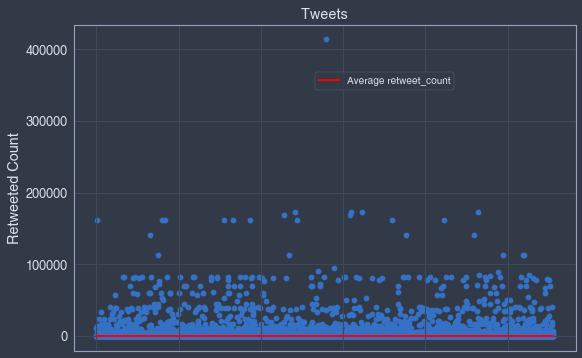

In [12]:
plt.figure(figsize=(9, 6))
ax = plt.subplot()
plt.scatter(range(len(all_tweets)), all_tweets['retweet_count'])
# Average line
ax.plot(range(len(all_tweets)), [avg_retweet_count for i in range(len(all_tweets))], linewidth=2, color="red")
# Labels
plt.tick_params(labelbottom=False) # labels along the bottom edge are off
plt.title('Tweets')
plt.ylabel('Retweeted Count')
plt.legend(['Average retweet_count'], loc=[0.48, 0.8], prop={'size': 10})

plt.savefig('graph/retweet_count.png')
plt.show()

The highest `"retweet_count"` value is an outlier, let's remove it from the graph and try to improve the readability of the average line.

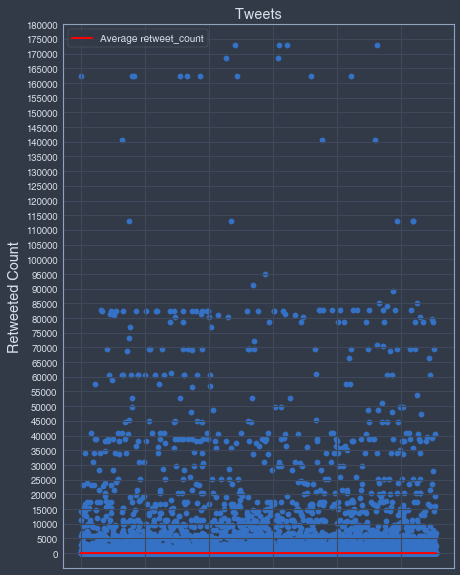

In [13]:
plt.figure(figsize=(7, 10))
plt.scatter(range(len(all_tweets)), all_tweets['retweet_count'])
plt.yticks(np.arange(0, all_tweets['retweet_count'].max() + 10000, step=5000))
# Removes the highest retweet_count value outlier, set y axis bottom to -1 and upper to 180000 
plt.ylim(-5000 ,180000)
# Average line
plt.plot(range(len(all_tweets)), [avg_retweet_count for i in range(len(all_tweets))], linewidth=2, color="red")
# Labels
plt.legend(['Average retweet_count'], prop={'size': 10}, loc='upper left')
plt.tick_params(labelbottom=False) # labels along the bottom edge are off
plt.title('Tweets')
plt.ylabel('Retweeted Count')
plt.tick_params(labelsize=9.5)

plt.savefig('graph/retweet_count_no_outliers.png')
plt.show()

Based on the above "retweet_count" data points distribution, I decided, on top of the 5 retweets count and the average retweets viral retweet benchmarks, to add an extra benchmark at the 10'000 retweets value count.

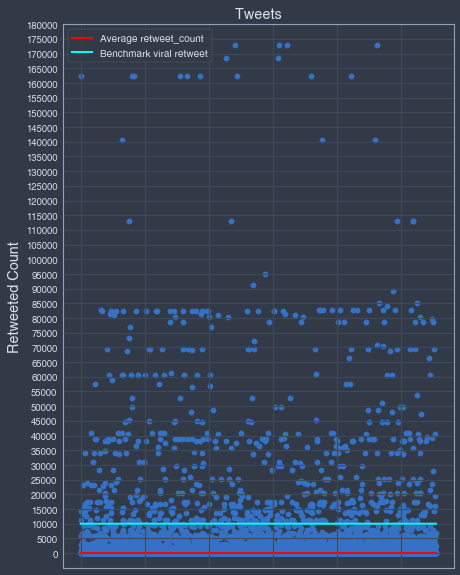

In [14]:
plt.figure(figsize=(7, 10))
plt.scatter(range(len(all_tweets)), all_tweets['retweet_count'])
plt.yticks(np.arange(0, all_tweets['retweet_count'].max() + 10000, step=5000))
# Removes the highest retweet_count value outlier, set y axis bottom to -1 and upper to 180000  
plt.ylim(-5000 ,180000)
# Average line
plt.plot(range(len(all_tweets)), [avg_retweet_count for i in range(len(all_tweets))], linewidth=2, color="red")
# Benchmark line
plt.plot(range(len(all_tweets)), [10000 for i in range(len(all_tweets))], linewidth=2, color="cyan")
# Labels
plt.legend(['Average retweet_count', 'Benchmark viral retweet'], loc='upper left', prop={'size': 10})
plt.tick_params(labelbottom=False) # labels along the bottom edge are off
plt.title('Tweets')
plt.ylabel('Retweeted Count')
plt.tick_params(labelsize=9.5)

plt.savefig('graph/retweet_count_benchmark.png')
plt.show()

For this particular data sample, the 10'000 `"retweet_count"` benchmark seems to be the best fitted `"retweet_count"` benchmark meeting the viral tweet  requirements definition.

Note:<br>
For this project, I decided to train and evaluate three different models using the benchmarks:
* 5 `"retweet_count"` benchmark
* Average `"retweet_count"` benchmark
* 10'000 `"retweet_count"` benchmark

### + Making Retweet Labels

* `"is_viral_retweet_b5"`, 5 `"retweet_count"` benchmark
* `"is_viral_retweet_b_avg"`, Average `"retweet_count"` benchmark
* `"is_viral_retweet_b10000"`, 10'000 `"retweet_count"` benchmark

The retweet count labels, `"is_viral_retweet_b..."`, purpose is to define viral retweet classes and to train the KNN classifier models.  

#### - Viral retweets'  classes:

- `0` class, is Not a viral retweet class
- `1` class, is a viral retweet class

`5 "retweet_count" benchmark` number of tweet by class

In [15]:
all_tweets['is_viral_retweet_b5'] = np.where(all_tweets['retweet_count'] >= 5, 1, 0)
all_tweets['is_viral_retweet_b5'].value_counts()

1    6242
0    4857
Name: is_viral_retweet_b5, dtype: int64

`Average "retweet_count" benchmark` number of tweet by class

In [16]:
all_tweets['is_viral_retweet_bavg'] = np.where(all_tweets['retweet_count'] >= avg_retweet_count, 1, 0)
all_tweets['is_viral_retweet_bavg'].value_counts()

1    5591
0    5508
Name: is_viral_retweet_bavg, dtype: int64

`10'000 "retweet_count" benchmark` number of tweet by class

In [17]:
all_tweets['is_viral_retweet_b10000'] = np.where(all_tweets['retweet_count'] >= 10000, 1, 0)
all_tweets['is_viral_retweet_b10000'].value_counts()

0    10449
1      650
Name: is_viral_retweet_b10000, dtype: int64

The `"is_viral_retweet_b10000"` label data, with a benchmark set to `10'000` retweets count, has a significantly lower amount of  'viral retweets class' data, `650`, than 'not-viral retweets class' data, `10449`.<br>
 
By consequence, the provided data, the classifier model training and test label sets contain a significant more amount of 'not-viral retweets class' than 'viral retweets class'.<br>
The data is imbalanced, [What Is Data Imbalance?](https://analyticsindiamag.com/5-different-ways-to-reduce-noise-in-an-imbalanced-dataset/)

<i>"Imbalanced dataset occurs when one set of classes are much more than the instances of another class where the majority and minority class or classes are taken as negative and positive. In other words, data imbalance takes place when the majority classes dominate over the minority classes.

Most machine learning models assume that data is equally distributed. This results in the algorithms being more biased towards majority classes, resulting in an unequal distribution of classes within a dataset. Also, most ML Algorithms are usually designed to improve accuracy by reducing the error. So they do not take into account the balance of classes. In such cases, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate."</i>

In other words, the significant difference between the amounts of 'not-viral retweet class' and 'viral retweet class' is corrupting the ["signal"](https://www.kdnuggets.com/2019/06/separating-signal-noise.html#:~:text=When%20we%20are%20building%20a,in%20the%20way%20of%20that.), the underlying pattern that you wish to learn from the data, [overfitting](https://elitedatascience.com/overfitting-in-machine-learning#examples) is occurring.

### + Exploring the feature "favorite_count"

The feature `"favorite_count"`, which indicates how many times the tweet has been liked, can be found in the dictionary `"retweeted_status"`.

#### - Adding the feature to the  "favorite_count"  to the  "all_tweet"  dataframe:

In [18]:
all_tweets['favorite_count'] = [0 if pd.isnull(all_tweets.loc[i]['retweeted_status']) \
                                  else all_tweets.loc[i]['retweeted_status']['favorite_count'] \
                                  for i in range(len(all_tweets))]
all_tweets['favorite_count']

0            0
1            0
2            0
3        40676
4           14
         ...  
11094     8925
11095    28381
11096        0
11097        3
11098        0
Name: favorite_count, Length: 11099, dtype: int64

##### - The tweet with the highest `"favorite_count" ` value:

In [19]:
all_tweets['favorite_count'].max()

560274

In [20]:
all_tweets.loc[all_tweets['favorite_count'] == all_tweets['favorite_count'].max()].T

,8460
created_at,2018-07-31 13:34:19+00:00
id,1024287141390499840
id_str,1024287141390499840
text,RT @itstae13: Stop getting rid of your pets be...
truncated,False
entities,"{'hashtags': [], 'symbols': [], 'user_mentions..."
metadata,"{'iso_language_code': 'en', 'result_type': 're..."
source,"<a href=""http://twitter.com/download/android"" ..."
in_reply_to_status_id,NaN
in_reply_to_status_id_str,NaN


In [21]:
avg_favorite_count = all_tweets['favorite_count'].median()
avg_favorite_count

23.0

Note:<br>
For this project, the total number of tweets provided with the data is `11'099` and the highest "favorite_count" value is `560'274`.

####  - "favorite_count" scatter plots:

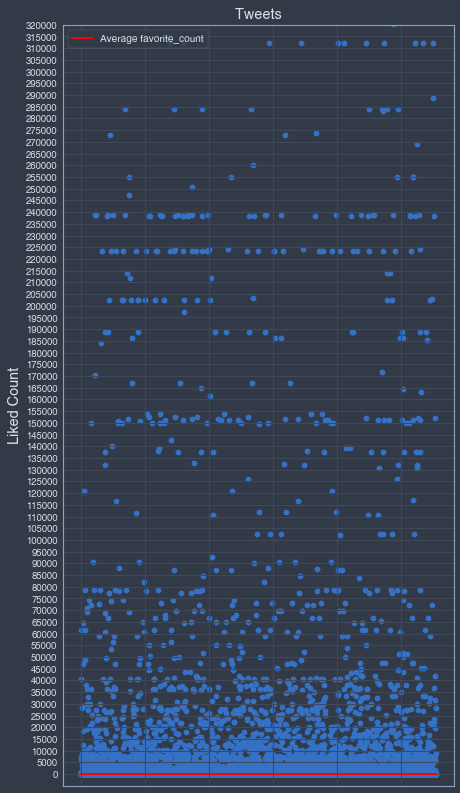

In [22]:
plt.figure(figsize=(7, 14))
plt.scatter(range(len(all_tweets)), all_tweets['favorite_count'])
plt.yticks(np.arange(0, all_tweets['favorite_count'].max() + 10000, step=5000))
# Removes the highest favorite_count values outliers, set y axis bottom to -1 and upper to 320000
plt.ylim(-5000, 320000)
# Average line
plt.plot(range(len(all_tweets)), [avg_favorite_count for i in range(len(all_tweets))], linewidth=2, color="red")
# Labels
plt.legend(['Average favorite_count'], prop={'size': 10}, loc='upper left')
plt.tick_params(labelbottom=False) # labels along the bottom edge are off
plt.title('Tweets')
plt.ylabel('Liked Count')
plt.tick_params(labelsize=9.5)

plt.savefig('graph/favorite_count.png')
plt.show()

Based on the above `"favorite_count"` data points distribution, I decided, on top of the 5 favorites count and the average favorites viral favorite benchmarks, to add an extra benchmark at the 10'000 favorites value count.

Note: the outliners data points representing a `"favorite_count"` over 350'000 are not visualized in the graph above.

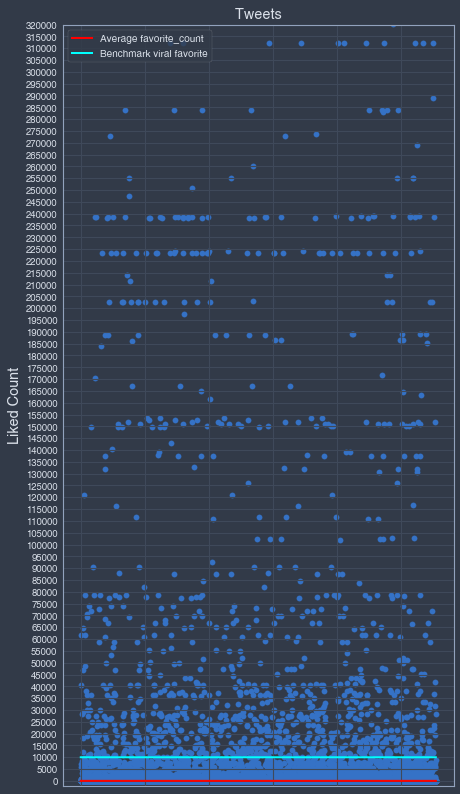

In [23]:
plt.figure(figsize=(7, 14))
plt.scatter(range(len(all_tweets)), all_tweets['favorite_count'])
plt.yticks(np.arange(0, all_tweets['favorite_count'].max() + 10000, step=5000))
# Removes the highest favorite_count values outliers, set y axis bottom to -1 and upper to 320000
plt.ylim(-2000, 320000)
# Average line
plt.plot(range(len(all_tweets)), [avg_favorite_count for i in range(len(all_tweets))], linewidth=2, color="red")
# Benchmark line
plt.plot(range(len(all_tweets)), [10000 for i in range(len(all_tweets))], linewidth=2, color="cyan")
# Labels
plt.legend(['Average favorite_count', 'Benchmark viral favorite'], prop={'size': 10})
plt.tick_params(labelbottom=False) # labels along the bottom edge are off
plt.title('Tweets')
plt.ylabel('Liked Count')
plt.tick_params(labelsize=9.5)

plt.savefig('graph/favorite_count_benchmark.png')
plt.show()

For this particular data sample, the 10'000 `"favorite_count"` benchmark seems to be the best fitted `"favorite_count"` benchmark meeting the viral tweet  requirements definition.

Note:<br>
For this project, with the `"retweet_count"` benchmarks, I decided to train and evaluate three different models using the benchmarks:
* 5 `"favorite_count"` benchmark
* Average `"favorite_count"` benchmark
* 10'000 `"favorite_count"` benchmark

### + Making Favorite Count Labels

favorite* `"is_viral_favorite_b5"`, 5 `"favorite_count"` benchmark
* `"is_viral_favorite_b_avg"`, Average `"favorite_count"` benchmark
* `"is_viral_favorite_b10000"`, 10'000 `"favorite_count"` benchmark

The favorite count labels, `"is_viral_favorite_b..."`, purpose is to define viral favorite classes and to train the KNN classifier models.  

#### Viral favorites'  classes:

- `0` class, is Not a viral favorite class
- `1` class, is a viral favorite class

5 `"favorite_count"` benchmark number of tweet by class:

In [24]:
all_tweets['is_viral_favorite_b5'] = np.where(all_tweets['favorite_count'] >= 5, 1, 0)
all_tweets['is_viral_favorite_b5'].value_counts()

1    6481
0    4618
Name: is_viral_favorite_b5, dtype: int64

Avarage `"favorite_count"` benchmark number of tweet by class:

In [25]:
# average favorites count
all_tweets['is_viral_favorite_bavg'] = np.where(all_tweets['favorite_count'] >= avg_favorite_count, 1, 0)
all_tweets['is_viral_favorite_bavg'].value_counts()

1    5581
0    5518
Name: is_viral_favorite_bavg, dtype: int64

In [26]:
# average favorites count
all_tweets['is_viral_favorite_b10000'] = np.where(all_tweets['favorite_count'] >= 10000, 1, 0)
all_tweets['is_viral_favorite_b10000'].value_counts()

0    9930
1    1169
Name: is_viral_favorite_b10000, dtype: int64

Similar to the `"is_viral_favorite_b10000"` label data, the `"is_viral_favorite_b10000"` label data with a benchmark set to the 10'000 favorites count, has a significantly lower amount of  'viral favorite class' data, `1'169`, than the data representing 'not-viral favorite class' data, `9'930`.

By consequence, the provided data, the classifier model training and test label sets contain a significant more amount of 'not-viral favorite class' than 'viral favorite class', [the data is imbalance](https://analyticsindiamag.com/5-different-ways-to-reduce-noise-in-an-imbalanced-dataset/).<br> 
In other words, the significant difference between the amounts of 'not-viral favorite class' and 'viral favorite class' is corrupting the ["signal"](https://www.kdnuggets.com/2019/06/separating-signal-noise.html#:~:text=When%20we%20are%20building%20a,in%20the%20way%20of%20that.), the underlying pattern that you wish to learn from the data, [overfitting](https://elitedatascience.com/overfitting-in-machine-learning#examples) is occurring.

## <b>Labels Sets</b>

The labels sets defining viral tweet classes, are a combinations of :
- 5 count benchmark
    - `"is_viral_retweet_b5"`
    - `"is_viral_favorite_b5"`
- average count benchmark
    - `"is_viral_retweet_bavg"`
    - `"is_viral_favorite_bavg"`
- 10000 count benchmark
    - `"is_viral_retweet_b10000"`
    - `"is_viral_favorite_b10000"`

In [27]:
# labels 5 count
labels_b5 = all_tweets[['is_viral_retweet_b5', 'is_viral_favorite_b5']]
# labels average count
labels_bavg = all_tweets[['is_viral_retweet_bavg', 'is_viral_favorite_bavg']]
# labels 10000 count
labels_b10000 = all_tweets[['is_viral_retweet_b10000', 'is_viral_favorite_b10000']]

### +  Defining the  'viral tweet'


The viral tweet labels:
- `"is_viral_tweet_b5"`, 5 `"retweet_count"` and `"favorite_count"` benchmark
- `"is_viral_tweet_bavg"`, Average `"retweet_count"` and `"favorite_count"` benchmark
- `"is_viral_tweet_b10000"`, 10'000 `"retweet_count"` and `"favorite_count"` benchmark 

Are combinations of four classes: 
- `[1, 1]` 'is a viral tweet', 'is a viral retweet' and  'is a viral favorite'
- `[1, 0]` 'is a viral a tweet', 'is a viral retweet' and 'is <b>not</b>-viral a favorite' 
- `[0, 1]` 'is a viral a tweet', 'is a viral favorite' and 'is <b>not</b>-viral a retweet'
- `[0, 0]` 'is <b>not</b>-viral a tweet', 'is <b>not</b>-viral a retweet', and 'is <b>not</b>-viral a favorite'

In [28]:
all_tweets['is_viral_tweet_b5'] = [[all_tweets.loc[i]['is_viral_retweet_b5'] , all_tweets.loc[i]['is_viral_favorite_b5']] \
                                   for i in range(len(all_tweets))]
all_tweets['is_viral_tweet_bavg'] = [[all_tweets.loc[i]['is_viral_retweet_bavg'] , all_tweets.loc[i]['is_viral_favorite_bavg']] \
                                     for i in range(len(all_tweets))]
all_tweets['is_viral_tweet_b10000'] = [[all_tweets.loc[i]['is_viral_retweet_b10000'] , all_tweets.loc[i]['is_viral_favorite_b10000']] \
                                       for i in range(len(all_tweets))]

all_tweets['is_viral_tweet_b10000']

0        [0, 0]
1        [0, 0]
2        [0, 0]
3        [1, 1]
4        [0, 0]
          ...  
11094    [0, 0]
11095    [0, 1]
11096    [0, 0]
11097    [0, 0]
11098    [0, 0]
Name: is_viral_tweet_b10000, Length: 11099, dtype: object

## <b>Making Features</b>

After defining the labels. I created the features data utilize to train and test the K-Nearest Neighbors (KNN) classifier models. 

I chose to use:
* The length of the tweet.
* The number followers
* The friend count
* The number of hashtags in the tweet.
* The number of links in the tweet. 
* The number of words in the tweet. 

### + The Selected Features

In [29]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['hastags_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis=1)
all_tweets['links_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('http'), axis=1)
all_tweets['words_count'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis=1)
# The following features are found in the user dictionary
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

all_tweets.to_csv('data/all_tweets.csv')

### + The Select Feature Data

The data is a combination of all the selected features data, the purpose of the data is  to train the KNN classifier models.

In [30]:
data = all_tweets[['tweet_length','followers_count','friends_count', 'tweet_length', 'hastags_count', 'links_count', 'words_count']]

## <b>Creating Training Sets And Test Sets</b>

To split the provided data into training and test sets, I used the `"train_test_split"`function with the argument `"random_state = 1"`, which sets the [random seed](https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79#:~:text=%E2%9D%93%20What%20is%20a%20Random,data%20science%20and%20other%20fields.) to 1, to ensure that results are reproducible.

In [31]:
# 5 count benchmark
train_data_b5, test_data_b5, train_labels_b5, test_labels_b5 = train_test_split(data, 
                                                                                labels_b5, 
                                                                                test_size = 0.2, 
                                                                                random_state = 1)
# avg count benchmark
train_data_bavg, test_data_bavg, train_labels_bavg, test_labels_bavg = train_test_split(data, 
                                                                                        labels_bavg, 
                                                                                        test_size = 0.2, 
                                                                                        random_state = 1)
# 10000 count benchmark
train_data_b10000, test_data_b10000, train_labels_b10000, test_labels_b10000 = train_test_split(data, 
                                                                                                labels_b10000, 
                                                                                                test_size = 0.2, 
                                                                                                random_state = 1)

In [32]:
# Labels Test Sample
test_labels_b5

,is_viral_retweet_b5,is_viral_favorite_b5
9527,0,1
220,1,1
9132,1,1
307,1,1
1966,1,1
...,...,...
11060,0,0
3035,0,0
3393,1,1
6034,1,1


## <b>Normalizing Selected Features' Data</b>

Many machine learning algorithms attempt to find trends in the data by comparing features of data points. However, there is an issue when the features are on drastically different scales.<br>
[Normalizing the data](https://www.codecademy.com/articles/normalization) is the action of scaling the data.

In [33]:
# Using the sklearn.preprocessing library
# 5 count benchmark
scaled_train_data_b5 = scale(train_data_b5, axis=0)
scaled_test_data_b5 = scale(test_data_b5, axis=0)
# Average count benchmark
scaled_train_data_bavg = scale(train_data_bavg, axis=0)
scaled_test_data_bavg = scale(test_data_bavg, axis=0)
# 10000 count benchmark
scaled_train_data_b10000 = scale(train_data_b10000, axis=0)
scaled_test_data_b10000 = scale(test_data_b10000, axis=0)
# Scaled data Sample
print(scaled_train_data_b5[0])
# Not scaled sample 
print()
print(train_data_b5.loc[0])

[-0.74326103 -0.02549497 -0.10028374 -0.74326103 -0.32065988  1.1246492
 -0.9627669 ]

tweet_length       140
followers_count    215
friends_count      335
tweet_length       140
hastags_count        0
links_count          0
words_count         26
Name: 0, dtype: int64


## <b>Classifier Models</b>

I created the KNN models with `k = 5`, using the sklearn class `"KNeighborsClassifier"` with `"n_neighbors = 5"`.

Next, I trained and then scored the models test sets and saved the results in a DataFrame.

The `"KNeighborsClassifier.score()"` returns the estimated mean accuracy on a given test data and labels.<br> 
In other words, the [accuracy score](https://developers.google.com/machine-learning/crash-course/classification/accuracy#:~:text=Accuracy%20is%20one%20metric%20for,predictions%20Total%20number%20of%20predictions) score  is the estimated percentage of 'viral tweet class' and 'not-viral tweet class' data that the algorithm may classify correctly.

In [34]:
# Model evalution dataframe
classifiers_eval = pd.DataFrame()
# 5 count benchmark 
classifier_b5 = KNeighborsClassifier(n_neighbors = 5)
classifier_b5.fit(scaled_train_data_b5, train_labels_b5)
# Accuracy scores
accuracy_test_b5 = classifier_b5.score(scaled_test_data_b5, test_labels_b5)

# avg count benchmark 
classifier_bavg = KNeighborsClassifier(n_neighbors = 5)
classifier_bavg.fit(scaled_train_data_bavg, train_labels_bavg)
# Accuracy scores
accuracy_test_bavg = classifier_bavg.score(scaled_test_data_bavg, test_labels_bavg)

# 10000 count benchmark 
classifier_b10000 = KNeighborsClassifier(n_neighbors = 5)
classifier_b10000.fit(scaled_train_data_b10000, train_labels_b10000)
# Accuracy scores
accuracy_test_b10000 = classifier_b10000.score(scaled_test_data_b10000, test_labels_b10000)

# Storing Scores
classifiers_eval['Classifiers'] = ['5 count benchmark', 'avg count benchmark', '10000 count benchmark']
classifiers_eval['Test Accuracy'] = [accuracy_test_b5, accuracy_test_bavg, accuracy_test_b10000]

classifiers_eval.style.set_properties(**{'text-align': 'right'})

,Classifiers,Test Accuracy
0,5 count benchmark,0.725225
1,avg count benchmark,0.675676
2,10000 count benchmark,0.884234


The `10000 count benchmark` classifier has a higher accuracy value than the other two classifiers.<br>

Accuracy can be an extremely misleading statistic depending on the data.<br>
For example, when using the `10000 count benchmark` classifier, like I mentioned earlier, [the data is imbalance](https://analyticsindiamag.com/5-different-ways-to-reduce-noise-in-an-imbalanced-dataset/), the significant difference between the amounts of 'not-viral tweets class' and 'viral tweets class' in the provided data is corrupting the ["signal"](https://www.kdnuggets.com/2019/06/separating-signal-noise.html#:~:text=When%20we%20are%20building%20a,in%20the%20way%20of%20that.), overfitting of a label class is occurring and rendering an unreliable high accuracy score.

More info: [Overfitting in Machine Learning](https://elitedatascience.com/overfitting-in-machine-learning)

## <b>Models Evaluations<b>

To evaluate the models, I used the scaled test data sets to predict whether or not a tweet is a viral tweet, and compared the predicted results against the test labels sets  by using the fallowing evaluation metrics:
- Recall
- Precision<br><br> 

More info: [5 Classification Evaluation metrics](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)

### + Predictions:
The relative small size of the provided data 

In [35]:
predictions_b5 = classifier_b5.predict(scaled_test_data_b5)
predictions_bavg = classifier_bavg.predict(scaled_test_data_bavg)
predictions_b10000 = classifier_b10000.predict(scaled_test_data_b10000)

# Predictions sample
predictions_b5

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [0, 0],
       [1, 1],
       [1, 1]])

In [36]:
#processed_test_labels_b5 = [1 if tweet_sum == 2 else 0 for tweet_sum in [sum(all_tweets['is_viral_tweet_b5'].loc[index]) for index in test_labels_b5.index]]
processed_test_labels_b5 = [sum(tweet) for tweet in [all_tweets['is_viral_tweet_bavg'].loc[index] for index in test_labels_b5.index]]

processed_predictions_b5 = [sum(tweet) for tweet in predictions_b10000]
        

#processed_predictions_b5 = [1 if tweet_sum == 2 else 0 for tweet in [sum(tweet) for tweet in predictions_b5]]
print(precision_score(processed_test_labels_b5, processed_predictions_b5, average='weighted'))
print(precision_score(test_labels_bavg, predictions_bavg, average=None))
print(precision_score(test_labels_bavg, predictions_bavg, average='weighted'))
accuracy_score(processed_test_labels_b5, processed_predictions_b5)

0.5665249742139278
[0.70402053 0.70247229]
0.7032488472456343


0.481981981981982

### + Precision:

[Precision](https://en.wikipedia.org/wiki/Precision_and_recall) measures the percentage of items the classifier found that were actually relevant.<br>
In other words, precision is the percentage of predicted 'viral retweet class' and predicted 'viral favorites class' data that was correctly classified.

In [37]:
# Calculating precision scores
# The argument "average='weighted'" returns the averaged precision score of the two classes precision scores 
precision_b5 = precision_score(test_labels_b5, predictions_b5, average='weighted')
precision_bavg = precision_score(test_labels_bavg, predictions_bavg, average='weighted')
precision_b10000 = precision_score(test_labels_b10000, predictions_b10000, average='weighted')

classifiers_eval['Precision'] = [precision_b5, precision_bavg, precision_b10000]
classifiers_eval.style.set_properties(**{'text-align': 'right'})

,Classifiers,Test Accuracy,Precision
0,5 count benchmark,0.725225,0.773221
1,avg count benchmark,0.675676,0.703249
2,10000 count benchmark,0.884234,0.483225


The `10000 count benchmark` classified model classified the 'viral retweet class' and the 'viral favorite class' combined data correctly 48% of the time.

### + Recall:

[Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall) measures the percentage of the relevant items the classifier was able to successfully find. measures the percentage of the relevant items the classifier was able to successfully find.<br>
In other words, recall is the combined percentage of predicted 'viral retweet class' and predicted 'viral favorite class' data that the classifier model successfully classify.

In [38]:
# calculating recall scores
# The argument "average='weighted'" returns the averaged recall score of the two classes recall scores 
recall_b5 = recall_score(test_labels_b5, predictions_b5, average='weighted')
recall_bavg = recall_score(test_labels_bavg, predictions_bavg, average='weighted')
recall_b10000 = recall_score(test_labels_b10000, predictions_b10000, average='weighted')

classifiers_eval['Recall'] = [recall_b5, recall_bavg, recall_b10000]
classifiers_eval.to_csv('data/classifiers_eval.csv')
classifiers_eval.style.set_properties(**{'text-align': 'right'})

,Classifiers,Test Accuracy,Precision,Recall
0,5 count benchmark,0.725225,0.773221,0.818686
1,avg count benchmark,0.675676,0.703249,0.740225
2,10000 count benchmark,0.884234,0.483225,0.144670


The `10000 count benchmark` classifier has a notable lower recall score than the other two classifiers, like I mentioned earlier, the significant difference between the amounts of 'not-viral tweet class' data and ' viral tweet class' data is corrupting the ["signal"](https://www.kdnuggets.com/2019/06/separating-signal-noise.html#:~:text=When%20we%20are%20building%20a,in%20the%20way%20of%20that.), the underlying pattern that you wish to learn from the data, overfitting of the label class 'not-viral tweet class' data is occurring and rendering a too low of an amount of predicted 'viral tweet class' data.

### + Test  'is a viral tweet class' data vs predicted 'is a viral tweet class' data

In [39]:
# ----------- Test sets Viral Retweets, Favorites and Tweets
# Creates a Predictions vs test DataFrame
prediction_vs_test = pd.DataFrame({'Classifiers':['5 count benchmark', 'avg count benchmark', '10000 count benchmark']})
# Test viral retweets    
test_viral_retweets_b5 = test_labels_b5['is_viral_retweet_b5'].sum()
test_viral_retweets_bavg = test_labels_bavg['is_viral_retweet_bavg'].sum()
test_viral_retweets_b10000 = test_labels_b10000['is_viral_retweet_b10000'].sum()
# Test viral favorites
test_viral_favorites_b5 = test_labels_b5['is_viral_favorite_b5'].sum()
test_viral_favorites_bavg = test_labels_bavg['is_viral_favorite_bavg'].sum()
test_viral_favorites_b10000 = test_labels_b10000['is_viral_favorite_b10000'].sum()
# Test viral tweets
test_viral_tweets_b5 = len(test_labels_b5[(test_labels_b5['is_viral_retweet_b5'] == 1) & \
                                          (test_labels_b5['is_viral_favorite_b5'] == 1)])
test_viral_tweets_bavg = len(test_labels_bavg[(test_labels_bavg['is_viral_retweet_bavg'] == 1) & \
                                              (test_labels_bavg['is_viral_favorite_bavg'] == 1)])
test_viral_tweets_b10000 = len(test_labels_b10000[(test_labels_b10000['is_viral_retweet_b10000'] == 1) & \
                                                  (test_labels_b10000['is_viral_favorite_b10000'] == 1)])

# ----------- Predicted Viral Retweets, Favorites and Tweets
predicted_viral_retweets_favorites_b5 = np.sum(predictions_b5, axis=0)
predicted_viral_retweets_favorites_bavg = np.sum(predictions_bavg, axis=0)
predicted_viral_retweets_favorites_b10000 = np.sum(predictions_b10000, axis=0)
# ----------- Predicted Viral Tweets
predicted_viral_tweets_b5 = len([tweet for tweet in predictions_b5 if tweet[0] == 1 and tweet[1] == 1])
predicted_viral_tweets_bavg = len([tweet for tweet in predictions_bavg if tweet[0] == 1 and tweet[1] == 1])
predicted_viral_tweets_b10000 = len([tweet for tweet in predictions_b10000 if tweet[0] == 1 and tweet[1] == 1])

# Saving viral retweets
prediction_vs_test['Predicted Viral Retweets'] = [predicted_viral_retweets_favorites_b5[0], 
                                                predicted_viral_retweets_favorites_bavg[0],
                                                predicted_viral_retweets_favorites_b10000[0]]
prediction_vs_test['Test Set Viral Retweets'] = [test_viral_retweets_b5, 
                                               test_viral_retweets_bavg, 
                                               test_viral_retweets_b10000]
# Saving viral favorites
prediction_vs_test['Predicted Viral Favorites'] = [predicted_viral_retweets_favorites_b5[1], 
                                                 predicted_viral_retweets_favorites_bavg[1], 
                                                 predicted_viral_retweets_favorites_b10000[1]]
prediction_vs_test['Test Set Viral Favorites'] = [test_viral_favorites_b5, 
                                                test_viral_favorites_bavg, 
                                                test_viral_favorites_b10000]
# Saving viral tweets
prediction_vs_test['Predicted Viral Tweets'] = [predicted_viral_tweets_b5, 
                                              predicted_viral_tweets_bavg, 
                                              predicted_viral_tweets_b10000]
prediction_vs_test['Test Set Viral Tweets'] = [test_viral_tweets_b5, 
                                             test_viral_favorites_bavg, 
                                             test_viral_tweets_b10000]

prediction_vs_test.to_csv('data/prediction_vs_test.csv')
prediction_vs_test.style.set_properties(**{'text-align': 'right'})

,Classifiers,Predicted Viral Retweets,Test Set Viral Retweets,Predicted Viral Favorites,Test Set Viral Favorites,Predicted Viral Tweets,Test Set Viral Tweets
0,5 count benchmark,1321,1236,1354,1290,1301,1220
1,avg count benchmark,1169,1116,1173,1109,1131,1109
2,10000 count benchmark,44,148,74,246,43,146


The `10000 count benchmark`classifier model predicted a significantly lower amount of "Predicted Viral Tweets" than the "Test Set Viral Tweets" contain, validating the assumption that the data is imbalanced, the "signal" is weak and  'not-viral tweet class' data overfitting is occurring, when using the 10'000 benchmark with the features "retweet_count" and "favorite_count". The model is deficient at predicting a significant amount of  'viral tweet class' data.

## <b>Improving Models</b>

The Codecademy project guide goal is to predict whether or not a tweet will go viral using a K-Nearest Neighbor classifier model using the `5 count benchmark` or the `average count benchmark` classifiers.

The classifiers, respectively, predict if a tweet will have 5 or more retweets or/and favorites, and if a tweet will have an average or more retweets or/and favorites.<br> 
Earlier, a real viral tweet was defined as a tweet having hundreds of thousands of retweets, likes and replies, under that definition, both classifiers are not the right models to predict whether or not a tweet will go viral.<br> 
But due to the size of the provided data (sharing files on the web size limitations), the test and training sets relative small sizes and other limiting factors, and for the sake of this exercise, a viral tweet would be best defined as a tweet with an average retweet and favorite counts.

The KNN classifier models can be improved by finding the best K value for each model. I found the best K fit for each models by initializing the model with different k values, and by training and evaluating the initialized models.

I also tried to address the class imbalanced issue bring up when using the `10000 count benchmark` classifier model.<br>
Different ways can be utilize to address imbalanced data, [5 Different Ways To Reduce Noise In An Imbalanced Dataset](https://analyticsindiamag.com/5-different-ways-to-reduce-noise-in-an-imbalanced-dataset/).<br>
To address the imbalanced between the amounts of 'viral tweet class' data and  'not-viral a tweet class', I tried:
- to calibrate my `10000 count benchmark` classifier model using the [CalibratedClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html) from the SKlearn library, [How to Calibrate Probabilities for Imbalanced Classification](machinelearningmastery.com/probability-calibration-for-imbalanced-classification/).
- to utilize a different model, the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model from SKlearn library with the argument `class_weight=‘balanced’`.

### + Calibrating KNN Classifier 10'000 Benchmark

In [40]:
from sklearn.calibration import CalibratedClassifierCV

In [41]:
# Initialing KNN model
model = KNeighborsClassifier()
# Calibrating KNN model
cal_classifier_b10000 = CalibratedClassifierCV(model, cv=3, method='sigmoid')
# Processes train and test labels before using it with the calibrated KNN classifier model
p_train_labels = np.ravel(train_labels_b10000.iloc[:, 0].values.reshape(-1, 1))
p_test_labels = np.ravel(test_labels_b10000.iloc[:, 0].values.reshape(-1, 1))
# Training model
cal_classifier_b10000.fit(scaled_train_data_b10000, p_train_labels)
# Model Predictions
cal_predictions_b1000 = cal_classifier_b10000.predict(scaled_test_data_b10000)
# Model Eval
print('calibrated Classifier 10\'000 Benchmark Evaluation\n')
print(f'Accuracy: {cal_classifier_b10000.score(scaled_test_data_b10000, p_test_labels)}')
print(f'Precision: {precision_score(p_test_labels, cal_predictions_b1000)}')
print(f'Recall: {recall_score(p_test_labels, cal_predictions_b1000)}')

calibrated Classifier 10'000 Benchmark Evaluation

Accuracy: 0.9387387387387387
Precision: 0.8333333333333334
Recall: 0.10135135135135136


The above evaluation scores are the best results that I obtained after calibrating the `calibrated 10000 count benchmark model`.<br> Even if the precision has a sufficient high score the recall score is notably too low, the model is still deficient at predicting a significant amount of  'viral tweet class' data.

#### Note:
The provided data is just too small of a sample when using any of the KNN 10000 count benchmark models.

###  +  Logistic Regression Model, 10'000 count benchmark

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
# Initialing Logistic Regression model
Logreg_classifier_b10000 = LogisticRegression(class_weight='balanced')
# Training model
Logreg_classifier_b10000.fit(scaled_train_data_b10000, p_train_labels)
# Model Predictions
Logreg_predictions_b10000 = Logreg_classifier_b10000.predict(scaled_test_data_b10000)
# Model Eval
print('Logistic Regression Model 10\'000 Benchmark Evaluation\n')
print(f'Accuracy: {Logreg_classifier_b10000.score(scaled_test_data_b10000, p_test_labels)}')
print(f'Precision: {precision_score(p_test_labels, Logreg_predictions_b10000)}')
print(f'Recall: {recall_score(p_test_labels, Logreg_predictions_b10000)}')

Logistic Regression Model 10'000 Benchmark Evaluation

Accuracy: 0.4783783783783784
Precision: 0.09728867623604466
Recall: 0.8243243243243243


The `Logistic Regression 10000 count benchmark model with balanced classes` has a better recall score value than the `KNN 10000 count benchmark model` but the accuracy scores is low, and the precision score value is notable too low. The model is unreliable.

### + Choosing K

The KNN classifier models were initialized with `k = 5`, but I found the best K fit for each models by initializing the model with different K values, and by training and evaluating the initialized models.


#### - Best K values function
<br>

The function initializes KNN models with different K values and find the best K value for
* Accuracy score
* Precision score 
* Recall score

The `best_k_value()` function:
- Takes the arguments:
    - `train_data`: list, numpy.array or pandas.Series data type
    - `train_labels`: list, numpy.array or pandas.Series data type
    - `test_data`: list, numpy.array or pandas.Series data type 
    - `test_labels`: list, numpy.array or pandas.Series data type
    - `k_range`: integer data type, desired K range to evaluate
    - `grid_name`: string data type, grid title and grid saving name<br>
    <br>   
- Initializes KNN models with k_range values<br><br>
- Predicts<br><br>
- Computes 
    - Accuracy scores
    - Precision scores 
    - Recall scores<br><br>
- Finds best K for
    - Accuracy score
    - Precision score 
    - Recall score<br><br> 
- Outputs a one row three column graph grid
    - Accuracy scores vs K values
    - Precision scores vs K values
    - Recall scores vs K value<br><br>
- Saves grid as a .png with the name of the grid_name string value<br><br>
- returns 
    - a best K DataFrame
    - a evaluation K scores DataFrame

In [44]:
def best_k_value(train_data, train_labels, test_data, test_labels, k_range, grid_name):
    #
    # --------------------------------------------- Computes evaluation scores
    # Initializes Lists
    accuracies = []
    precisions = []
    recalls = []
    # K values loop
    for k in range(1, k_range):
        # Initializes model with the K value
        classifier = KNeighborsClassifier(n_neighbors = k)
        # Train model
        classifier.fit(train_data, train_labels)
        # Accuracy
        accuracies.append(classifier.score(test_data, test_labels))
        # Predicts 
        predictions = classifier.predict(test_data)
        # Computes evaluation scores
        precisions.append(precision_score(test_labels, predictions, average='weighted'))
        recalls.append(recall_score(test_labels, predictions, average='weighted'))
    # 
    # --------------------------------------------- Graph Grid  
    fig = plt.figure(figsize=(21, 6))
    fig.suptitle(f'{grid_name}', fontsize=18, color='lightgray')
    # Space between graphs
    plt.subplots_adjust(wspace=0.37)
    # Initializes Lists to be used with graphs
    eval_scores = [accuracies, precisions, recalls]
    eval_names = ['Accuracy', 'Precision', 'Recall']
    # Initializes best K dataframe
    df_best_k = pd.DataFrame(columns=['Evaluation', 'best_k', 'Test Accuracy', 'Precision', 'Recall'])   
    # Grid
    for i in range(3):
        # Plot grid location
        plt.subplot(1, 3, i+1)
        # Index of the highest score
        index_best_k = eval_scores[i].index(max(eval_scores[i][1:]))
        # Computing the ticks' step value to be render the x axis
        if int(k_range/11)%2 == 0:
            step = int(k_range/11)
        else:
            step = int(k_range/11)+1
        # Plot
        plt.plot(range(1,k_range), eval_scores[i], color='cyan')
        # Best K vertical line
        plt.axvline(index_best_k+1, linestyle=':', color='magenta')
        # x axis ticks
        plt.xticks(np.arange(0, k_range, step=step))
        # Plot titile and labels
        plt.title(f'Best K Value For {eval_names[i]}')
        plt.ylabel(eval_names[i])
        plt.xlabel('K')
        # ----- Text score box
        text_label = f'Best K for {eval_names[i]} = {index_best_k+1}\nTest Accuracy = {round(accuracies[index_best_k], 3)}\nPrecision = {round(precisions[index_best_k], 3)}\nRecall = {round(recalls[index_best_k], 3)}'
        # Computes the x and y axis text box location
        y = max(eval_scores[i]) - (((max(eval_scores[i]) - min(eval_scores[i]))/2)/2)*2
        x = index_best_k + 1 + step/2
        # The box
        plt.text(x, y, 
                 text_label, 
                 horizontalalignment='left', 
                 verticalalignment='center', 
                 bbox=dict(facecolor='#323a47', edgecolor='None', alpha=0.9))
        # Best k
        df_best_k = df_best_k.append({'Evaluation':eval_names[i], 
                                'best_k':index_best_k+1, 
                                'Test Accuracy':accuracies[index_best_k], 
                                'Precision':precisions[index_best_k],  
                                'Recall':recalls[index_best_k]}, ignore_index=True)
                                
    #
    # Saves grid
    plt.savefig(f'graph/{grid_name}.png')
    plt.show()
    # Evaluation score dataframe
    df_eval = pd.DataFrame({'K':range(1, k_range), 
                            'Test Accuracies':accuracies, 
                            'Precisions':precisions, 
                            'Recalls':recalls})
    return df_best_k, df_eval

#### - Best k for the KNN 5 count Benchmark Classifier

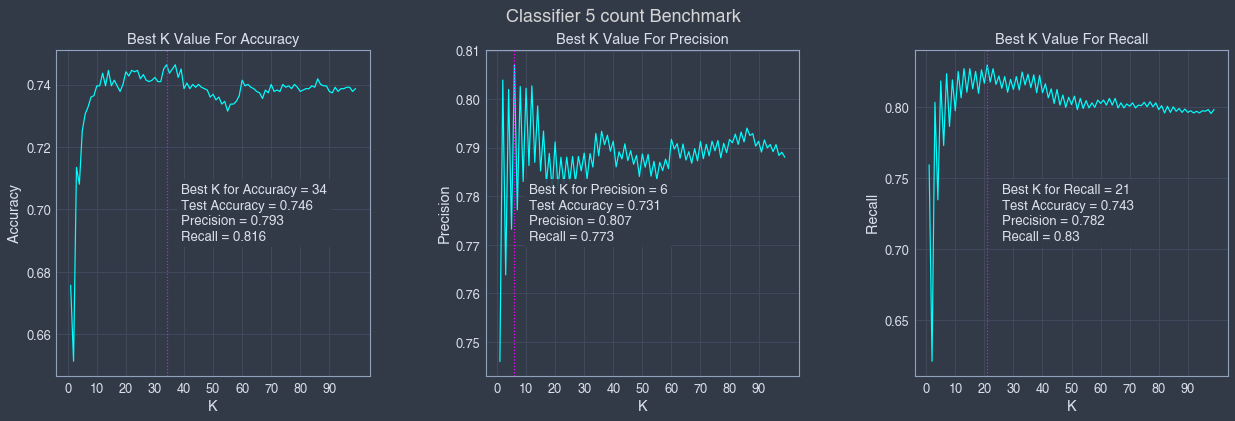

In [45]:
best_k_b5, k_eval_b5 = best_k_value(scaled_train_data_b5, train_labels_b5, 
                                    scaled_test_data_b5, test_labels_b5, 
                                    100, 'Classifier 5 count Benchmark')

best_k_b5.to_csv('data/best_k_b5.csv')
k_eval_b5.to_csv('data/k_eval_b5.csv')

Best K list:

In [46]:
#sets the output display precision in terms of decimal places, 3.
pd.set_option('precision', 3)

best_k_b5.style.set_properties(**{'text-align': 'right'})

,Evaluation,best_k,Test Accuracy,Precision,Recall
0,Accuracy,34,0.746,0.793,0.816
1,Precision,6,0.731,0.807,0.773
2,Recall,21,0.743,0.782,0.830


#### - Best k for the KNN average count Benchmark Classifier

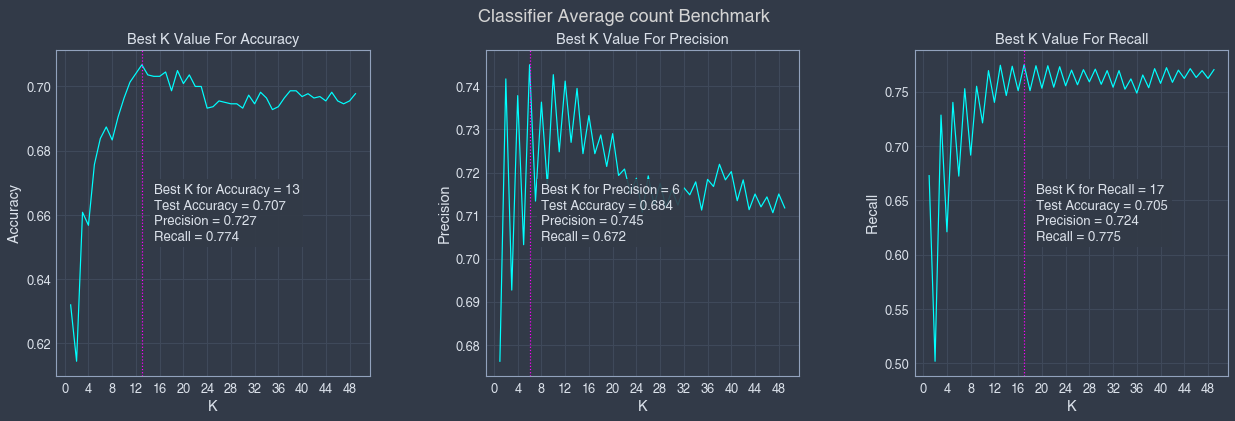

In [47]:
best_k_bavg, k_eval_bavg = best_k_value(scaled_train_data_bavg, train_labels_bavg, 
                                        scaled_test_data_bavg, test_labels_bavg, 
                                        50, 'Classifier Average count Benchmark')

best_k_bavg.to_csv('data/best_k_bavg.csv')
k_eval_bavg.to_csv('data/k_eval_bavg.csv')

Best K list:

In [48]:
best_k_bavg.style.set_properties(**{'text-align': 'right'})

,Evaluation,best_k,Test Accuracy,Precision,Recall
0,Accuracy,13,0.707,0.727,0.774
1,Precision,6,0.684,0.745,0.672
2,Recall,17,0.705,0.724,0.775


#### - Best k for the KNN 10'000 count Benchmark Classifier

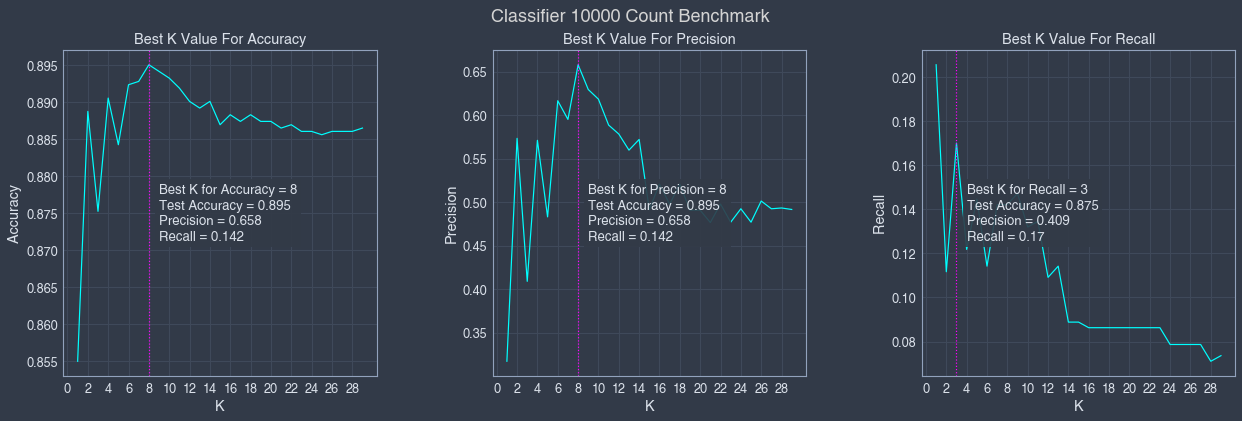

In [49]:
best_k_b10000, k_eval_b10000 = best_k_value(scaled_train_data_b10000, train_labels_b10000, 
                                           scaled_test_data_b10000, test_labels_b10000,  
                                           30, 'Classifier 10000 Count Benchmark')

best_k_b10000.to_csv('data/best_k_b10000.csv')
k_eval_b10000.to_csv('data/k_eval_b10000.csv')

Best K evaluation scores: 

In [50]:
best_k_b10000.style.set_properties(**{'text-align': 'right'})

,Evaluation,best_k,Test Accuracy,Precision,Recall
0,Accuracy,8,0.895,0.658,0.142
1,Precision,8,0.895,0.658,0.142
2,Recall,3,0.875,0.409,0.170


### Note:
The KNN 10'000 count Benchmark Classifier model could be improved by training it with data sets from larger size data samples than the one provided.